In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


import warnings
warnings.filterwarnings('ignore')


In [3]:
#Load the dataset

df = pd.read_csv("data.csv", encoding='utf-8')
df.shape

(98000, 30)

In [4]:
#Print the shape of data
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


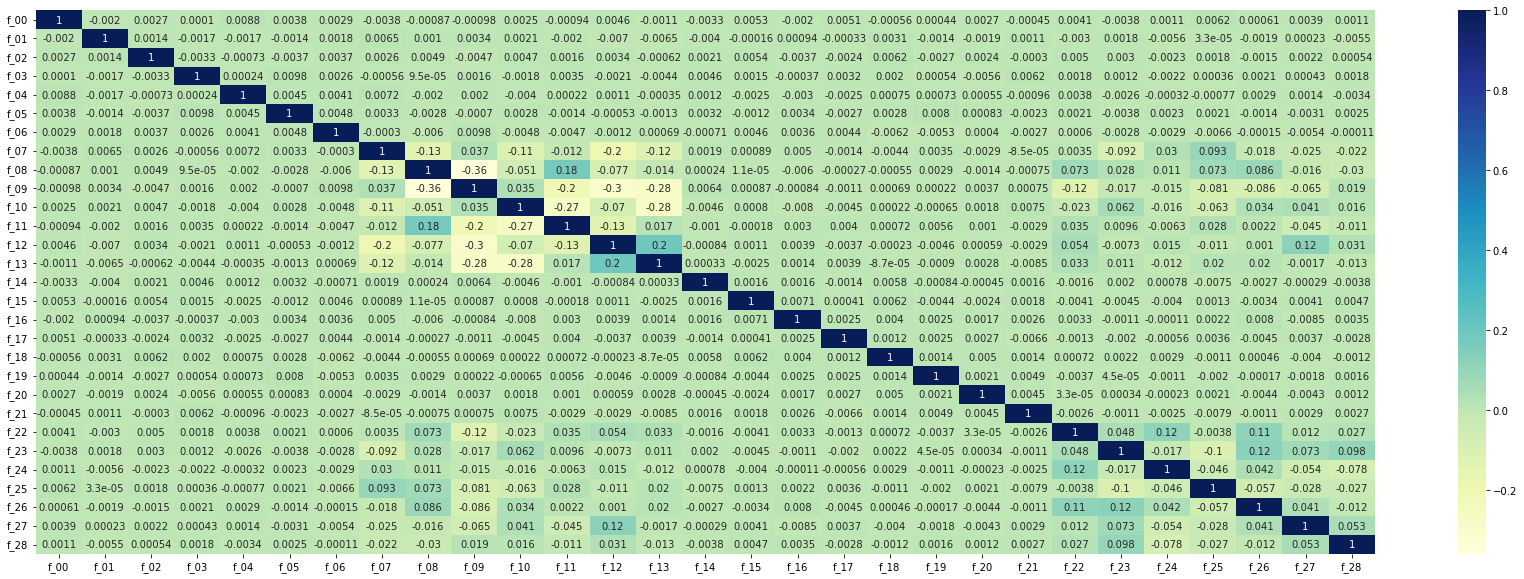

In [5]:
#The final matrix would only contain the data columns. Hence let's drop the country column
X = df.drop('id', axis=1)
plt.figure(figsize=(30,10))
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True);

In [6]:
# Drop the high corlated features
X = X.drop(["f_01","f_03","f_07","f_08","f_09","f_13","f_15","f_18","f_19","f_20","f_21","f_22","f_23","f_25"], axis=1)
X.head()

,f_00,f_02,f_04,f_05,f_06,f_10,f_11,f_12,f_14,f_16,f_17,f_24,f_26,f_27,f_28
0,-0.389420,0.648951,-0.830817,0.733624,2.258560,5,13,6,-0.469819,1.068105,-0.559650,-0.884274,1.309073,1.463002,0.813527
1,-0.689249,0.654175,-1.653020,0.863810,-0.090651,4,6,16,0.591035,0.145834,-0.030798,1.759412,-0.852168,0.562457,-2.680541
2,0.809079,-1.170602,0.105448,0.783948,1.988301,8,9,3,-0.679875,0.349843,-0.288042,-2.168635,1.335763,-1.110655,-3.630723
3,-0.500923,0.264109,0.415012,-1.221269,0.138850,8,9,6,-0.389456,-1.074543,-1.521753,1.440490,-0.630771,-0.050641,0.238333
4,-0.671268,-0.270155,-0.290108,-1.852809,0.781898,3,1,13,-0.120743,-1.064359,0.444142,1.473930,1.602686,-0.405263,-1.987263


In [7]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=123)

In [8]:
#let's apply PCA
pca.fit(X)

PCA(random_state=123, svd_solver='randomized')

In [9]:
#List of PCA components.It would be the same as the number of variables
pca.components_

array([[ 5.06399314e-04,  6.07330713e-04, -6.47184857e-04,
         5.71469749e-04, -3.29514928e-04,  8.31487983e-01,
        -5.54993834e-01,  1.65074516e-02, -6.44271046e-04,
        -1.55669320e-03, -1.09511079e-03, -3.25196507e-03,
         7.88056706e-03,  1.49062805e-02,  6.05716360e-03],
       [ 8.85094699e-04,  3.42642634e-04,  4.34541074e-04,
        -1.72969354e-04,  2.94487759e-04, -2.25422374e-01,
        -3.09289908e-01,  9.23104210e-01,  1.36637285e-04,
         1.02399001e-03, -7.83552613e-04,  7.00250402e-03,
        -2.49899004e-03,  3.52040754e-02,  1.02776375e-02],
       [ 9.04295942e-04,  1.85863452e-03, -5.66146401e-04,
         1.04522620e-04, -2.40628776e-03,  5.07289513e-01,
         7.72167987e-01,  3.81872064e-01, -1.31947605e-03,
        -2.22462073e-04, -3.46446670e-04, -5.06310626e-03,
         1.19294870e-02,  1.86026403e-02,  7.83364786e-03],
       [-7.86285115e-05, -2.25996911e-03,  1.99147987e-03,
         3.86531702e-04, -1.60608889e-03,  9.51311627

In [10]:
# Checking the variance Ratios
pca.explained_variance_ratio_

array([0.3374085 , 0.27467546, 0.17118726, 0.03398081, 0.02876602,
       0.02679978, 0.02148269, 0.01343587, 0.01334595, 0.01329785,
       0.01323624, 0.01314172, 0.0131339 , 0.01311099, 0.01299694])

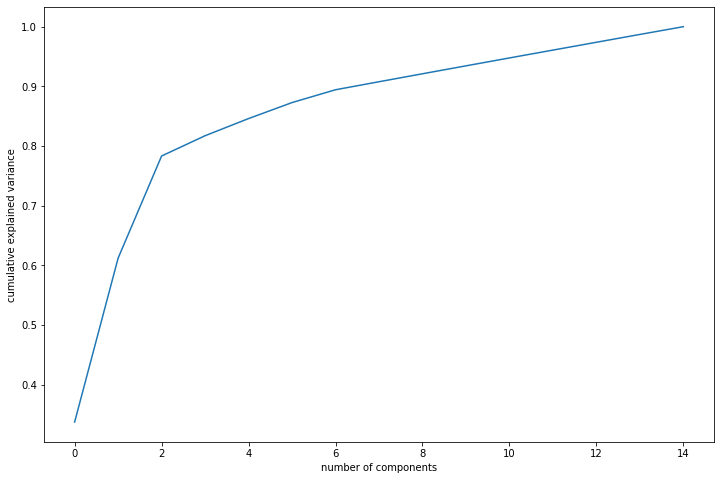

In [11]:
#plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Clearly over 90% of the data is properly explained by the first 3 principal components. Let's use them only for our clustering process

In [12]:
#Let's try and check the first three components now
colnames = list(X)
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})

In [13]:
pcs_df


,Feature,PC1,PC2,PC3
0,f_00,0.000506,0.000885,0.000904
1,f_02,0.000607,0.000343,0.001859
2,f_04,-0.000647,0.000435,-0.000566
3,f_05,0.000571,-0.000173,0.000105
4,f_06,-0.000330,0.000294,-0.002406
5,f_10,0.831488,-0.225422,0.507290
6,f_11,-0.554994,-0.309290,0.772168
7,f_12,0.016507,0.923104,0.381872
8,f_14,-0.000644,0.000137,-0.001319
9,f_16,-0.001557,0.001024,-0.000222


Let's plot them to get a better idea about which variables are well explained by these 3 components. We'll use only the first 2 PCs here and check their variance.

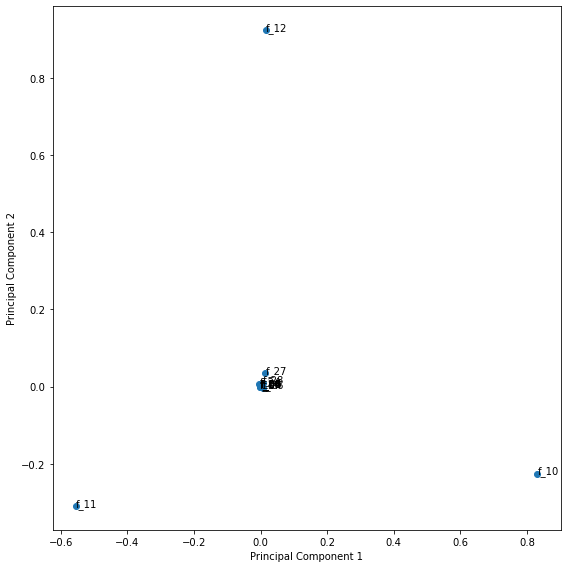

In [14]:
#Let's visualise the first 2 components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [17]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [18]:
#let's project our original data on the 3 principal components
df_train_pca = pca_final.fit_transform(X)
df_train_pca.shape

(98000, 3)

In [19]:
df_train_pca

array([[-5.24829203, -1.77400117,  1.88552042],
       [-2.08717882,  9.79878471, -0.28823254],
       [-0.64335559, -4.12973614, -0.90206504],
       ...,
       [ 0.82310882, -1.57913786, -4.03461187],
       [ 5.27714434,  2.67228281, -1.73306248],
       [-4.32630239,  3.06489647,  8.36695783]])

In [20]:
#take the transpose of the PC matrix so that we can create the new matrix
pc = np.transpose(df_train_pca)
pc

array([[-5.24829203, -2.08717882, -0.64335559, ...,  0.82310882,
         5.27714434, -4.32630239],
       [-1.77400117,  9.79878471, -4.12973614, ..., -1.57913786,
         2.67228281,  3.06489647],
       [ 1.88552042, -0.28823254, -0.90206504, ..., -4.03461187,
        -1.73306248,  8.36695783]])

In [22]:
##### Let's create the newer matrix according to the given principal components
rowname = list(df['id'])
pcs_df2 = pd.DataFrame({"id":rowname, 'PC1':pc[0], 'PC2':pc[1], 'PC3':pc[2]})
pcs_df2.head()

,id,PC1,PC2,PC3
0,0,-5.248292,-1.774001,1.885520
1,1,-2.087179,9.798785,-0.288233
2,2,-0.643356,-4.129736,-0.902065
3,3,-0.579246,-1.253847,0.252845
4,4,-0.184790,8.765763,-5.787939


In [23]:
pcs_df2.shape

(98000, 4)

In [24]:
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
# plt.boxplot(pcs_df2.PC1)
# Q1 = pcs_df2.PC1.quantile(0.05)
# Q3 = pcs_df2.PC1.quantile(0.95)
# IQR = Q3 - Q1
# pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

In [25]:
# plt.boxplot(pcs_df2.PC2)
# Q1 = pcs_df2.PC2.quantile(0.05)
# Q3 = pcs_df2.PC2.quantile(0.95)
# IQR = Q3 - Q1
# pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

In [26]:
# plt.boxplot(pcs_df2.PC3)
# Q1 = pcs_df2.PC3.quantile(0.05)
# Q3 = pcs_df2.PC3.quantile(0.95)
# IQR = Q3 - Q1
# pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

In [27]:
# plt.boxplot(pcs_df2.PC4)
# Q1 = pcs_df2.PC4.quantile(0.05)
# Q3 = pcs_df2.PC4.quantile(0.95)
# IQR = Q3 - Q1
# pcs_df2 = pcs_df2[(pcs_df2.PC4 >= Q1) & (pcs_df2.PC4<= Q3)]

In [28]:
# plt.boxplot(pcs_df2.PC5)
# Q1 = pcs_df2.PC5.quantile(0.05)
# Q3 = pcs_df2.PC5.quantile(0.95)
# IQR = Q3 - Q1
# pcs_df2 = pcs_df2[(pcs_df2.PC5 >= Q1) & (pcs_df2.PC5 <= Q3)]

In [29]:
#Outlier analysis is now done.Let's check the data again.
pcs_df2.shape

(98000, 4)

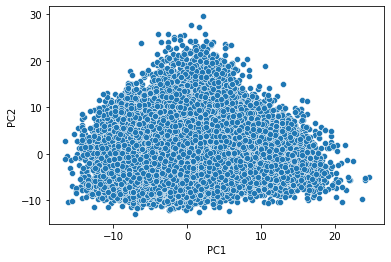

In [30]:
#let's check the spread of the dataset
sns.scatterplot(data=pcs_df2, x='PC1', y='PC2');

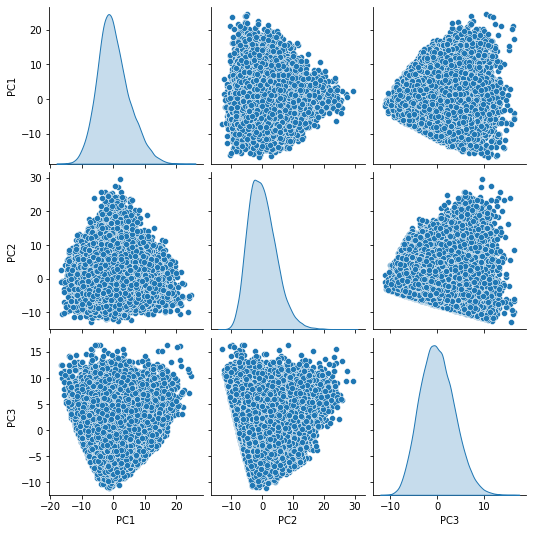

In [31]:
#X = pd.DataFrame(X)
sns.pairplot(pcs_df2[['PC1','PC2','PC3']], diag_kind='kde');

In [100]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [101]:
#Let's check the Hopkins measure
hopkins(pcs_df2.drop(['id'], axis=1))

0.8306200086994038

In [32]:
#0.91 is a good Hopkins score. Hence the data is suitable for clustering. Preliminary check is now done.
#We can do standardisation again or else we can skip this step as well.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

dat3 = pcs_df2
dat3_1 = standard_scaler.fit_transform(dat3.drop(['id'],axis=1))



In [33]:
dat3_1

array([[-1.03751187, -0.3886844 ,  0.52329768],
       [-0.41260524,  2.14691785, -0.07999458],
       [-0.12718215, -0.90482692, -0.25035451],
       ...,
       [ 0.16271678, -0.34598977, -1.11974552],
       [ 1.04321555,  0.58549829, -0.48098529],
       [-0.85524777,  0.67152011,  2.32212263]])

In [104]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

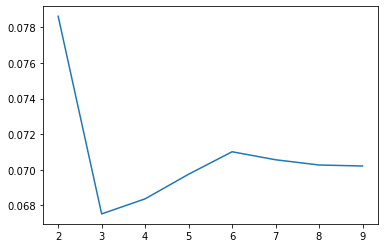

In [105]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

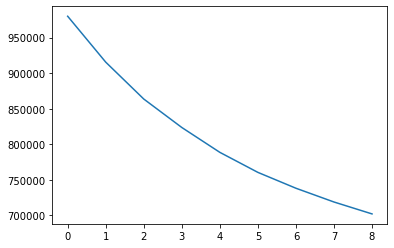

In [106]:
#The sihouette score reaches a peak at around 5 clusters indicating that it might be the ideal number of clusters.
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=1000)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd);

In [129]:
#A distinct elbow is formed at around 3-7 clusters. Let's finally create the clusters and see for ourselves which ones fare better
#K-means with k=5 clusters
model_clus5 = KMeans(n_clusters= 4, max_iter=78)
model_clus5.fit(dat3_1)

KMeans(max_iter=78, n_clusters=4)

In [130]:
dat4=dat3
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus5.labels_)], axis=1)
dat_km.columns = ['id', 'PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','Predicted']
dat_km.head()

,id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Predicted
0,0,-5.247638,-1.775027,1.884694,-1.487531,0.651471,1.740436,0.829645,-1.136274,0.520022,2.125379,3
1,1,-2.087869,9.800371,-0.287850,2.604170,-1.196696,-0.695273,0.733958,-1.038469,0.411869,0.999006,1
2,2,-0.643718,-4.129122,-0.905396,0.765480,-3.553179,2.148084,-1.320425,0.447642,0.787176,1.024561,3
3,3,-0.579242,-1.253537,0.254387,0.580979,0.973459,-0.949784,0.177047,0.237823,-2.225051,0.192367,0
4,4,-0.185256,8.767029,-5.787099,2.400885,-0.208235,1.423707,-0.654210,-0.315281,-1.682068,0.295708,1


In [131]:
dat_km['Predicted'].value_counts()

0    32647
3    25808
1    20168
2    19377
Name: Predicted, dtype: int64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

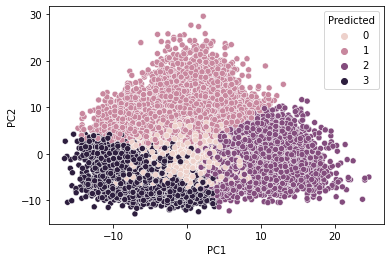

In [132]:
#Each cluster has a good number of countries associated with it(at least 5% of the dataset under consideration)
#Let's do some further visualizations.
#We'll be visualising the clusters on the original principal components
sns.scatterplot(x='PC1',y='PC2',hue='Predicted',legend='full',data=dat_km)

<AxesSubplot:xlabel='PC2', ylabel='PC3'>

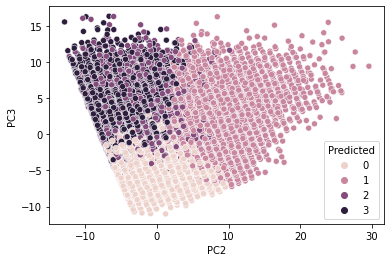

In [133]:
sns.scatterplot(x='PC2',y='PC3',hue='Predicted',data=dat_km)

In [136]:
#prediction = Kmeans.predict(X)
#df['Predicted'] = prediction
submition = dat_km[['id','Predicted']]
submition.to_csv('kmean_cluster_28jul.csv', index=False)

# BayesianGMMClassifier

In [34]:
from sklearn.mixture import BayesianGaussianMixture
cls_gaussian = BayesianGaussianMixture(n_components=7, tol=0.001, init_params='kmeans', n_init=5)
predict1 = cls_gaussian.fit_predict(dat3_1)

In [35]:
from sklego.mixture import BayesianGMMClassifier
bgmmC = BayesianGMMClassifier(n_components=7, covariance_type='full', max_iter=500, n_init=4 )
bgmmC.fit(dat3_1, predict1)
predict_2 = bgmmC.predict(dat3_1)

In [44]:
dat4=dat3
dat4.drop("id", axis=1, inplace=True)
cols = dat4.columns
cols

Index(['PC1', 'PC2', 'PC3'], dtype='object')

In [46]:

data = pd.DataFrame(dat3_1, columns=cols)
data["Predicted"] = predict_2
data.head()

,PC1,PC2,PC3,Predicted
0,-1.037512,-0.388684,0.523298,3
1,-0.412605,2.146918,-0.079995,4
2,-0.127182,-0.904827,-0.250355,1
3,-0.114509,-0.274718,0.070173,3
4,-0.036530,1.920582,-1.606355,0


In [48]:
submittion = pd.read_csv('sample_submission.csv')
submittion["Predicted"] = predict_2
submittion.to_csv('submittionPCA.csv', index=False)

In [138]:
#sns.pairplot(X_df,diag_kind='kde',hue='cluster_id')

In [139]:
# for i in cluster_range:
#     points = np.array(dat_km.loc[dat_km["Predicted"] == i])
# points

array([], shape=(0, 5), dtype=float64)

In [ ]:
# colors = ['r', 'g', 'b', 'y', 'c', 'm']
# fig, ax = plt.subplots()
# c = np.array([16,16])

# for i in labels:
#         points = np.array(dat_km.loc[dat_km['Predicted'] == i])
#         #c[i] = np.mean(points, axis=0)
#         ax.scatter(points[:, 0], points[:, 4], s=7, c=colors[i])

In [ ]:
# silhouette analysis
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# for num_clusters in range range_n_clusters:
#     # intialise kmeans
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
#     kmeans.fit(dat3_1)
#     cluster_labels = kmeans.labels_
#     # silhouette score
#     silhouette_avg = silhouette_score(dat3_1, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

In [ ]:
# # final model with k=3
# Kmeans = KMeans(n_cluster=5, max_iter=50)
# Kmeans.fit(dat3_1)
# Kmeans.labels_

In [ ]:
# # assign the label
# df['Predicted'] = Kmeans.labels_
# df.head()

In [ ]:
#prediction = Kmeans.predict(X)
# #df['Predicted'] = prediction
# dat4=dat3
# dat4.index = pd.RangeIndex(len(dat4.index))
# dat_km = pd.concat([dat4, pd.Series(Kmeans.labels_)], axis=1)
# dat_km.columns = ['id', 'PC1', 'PC2','PC3','Predicted']
# dat_km.head()

# submition = dat_km[['id','Predicted']]
# submition.to_csv('kmean_cluster_7.csv', index=False)

## Hierarchical Clustering
Let's check if hierarchical clustering does a good job.

In [77]:
# # dtype='uint8'
# # dat3_1
# # mask = np.zeros(dat3_1.shape,dtype='uint8')
# # mask

# g = sns.clustermap(dat3_1, standard_scale=1)

In [ ]:
# Let's try hierarchical clustering to see if it works well
# First we'll try the single linkage procedure.

mergings = linkage(dat3_1, method = "complete", metric = "euclidean")
dendrogram(mergings)
plt.show()

In [81]:
#We don't get good results here.
# #Let's try complete linkage method
# mergings = linkage(dat3_1, method = "complete", metrics = "euclidean")
# dendrogram(mergings)
# plt.show()

In [82]:
# #Okay now we are seeing some good clusters here. Let's see if they make sense if we eliminate the barriers
# clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
# dat3_hc = pd.concat([dat3, clusterCut], axis=1)
# dat3_hc.columns = ['id', 'PC1', 'PC2','PC3','Predicted']
# dat3_hc

In [83]:
# submition = dat3_hc[['id','Predicted']]
# submition.to_csv('kmean_cluster_6_28-Jul-2022.csv', index=False)

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from sklearn import metrics

In [ ]:

# df = pd.read_csv("data.csv", encoding='utf-8')
# df.shape
# define the number of kilometers in one radian
kms_per_radian = 6371.0088


In [100]:
# represent points consistently as (lat, lon)
coords = pcs_df2.as_matrix(columns=['PC1', 'PC2','PC3'])

# define epsilon as 1.5 kilometers, converted to radians for use by haversine
epsilon = 1.5 / kms_per_radian

,id,PC1,PC2,PC3
0,0,1.551318,-5.270682,-3.285193
1,1,-4.569693,0.755244,10.140829
2,2,-4.348594,-1.453360,-3.371498
3,3,6.139278,-1.534953,1.141544
4,4,-5.005136,0.050088,8.572908
...,...,...,...,...
97995,97995,-0.506854,-2.181836,0.839226
97996,97996,-8.260404,1.777295,5.576330
97997,97997,3.227819,-0.515428,-2.811595
97998,97998,3.003145,5.538998,1.942415


In [ ]:
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(df), num_clusters, 100*(1 - float(num_clusters) / len(df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))


In [ ]:
# turn the clusters in to a pandas series, where each element is a cluster of points
clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])

In [ ]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = clusters.map(get_centermost_point)


In [ ]:
# unzip the list of centermost points (lat, lon) tuples into separate lat and lon lists
PC1, PC2, PC3 = zip(*centermost_points)

# from these lats/lons create a new df of one representative point for each cluster
rep_points = pd.DataFrame({'PC1':PC1, 'PC2':PC2, 'PC3':PC3})
rep_points.tail()